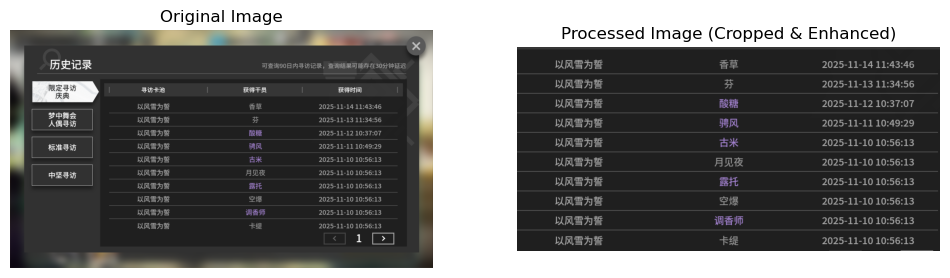

OCR result for ./images\MuMu-20251209-171246-566.png:
以风雪为的
以风雪为的
以风雪为的
以风雪为的
以风雪为的
以风雪为的
以风雪为的
以风雪为的
以风雪为的
以风雪为的

2025-11-14 11:43:46
2025-11-13 11:34:56
2025-11-12 10:37:07
2025-11-11 10:49:29
2025-11-10 10:56:13
2025-11-10 10:56:13
2025-11-10 10:56:13
2025-11-10 10:56:13
2025-11-10 10:56:13
2025-11-10 10:56:13




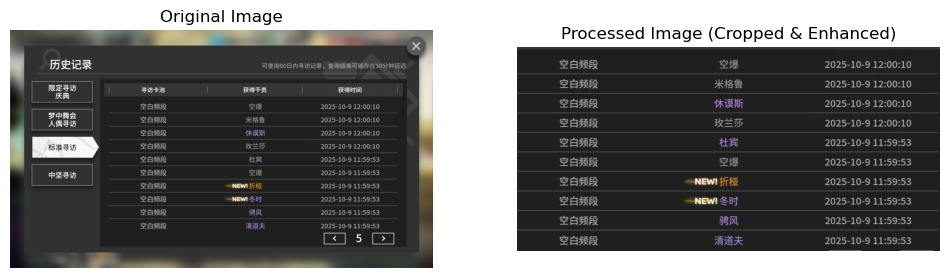

OCR result for ./images\MuMu-20251209-171907-431.png:
=
=
=
=
=
=
=
=
=
空白频

交欢交欢交欢次送关|病

2025-10-9 12:00:10
2025-10-9 12:00:10
2025-10-9 12:00:10
2025-10-9 12:00:10
2025-10-9 11:59:53
2025-10-9 11:59:53
2025-10-9 11:59:53
2025-10-9 11:59:53
2025-10-9 11:59:53
2025-10-9 11:59:53




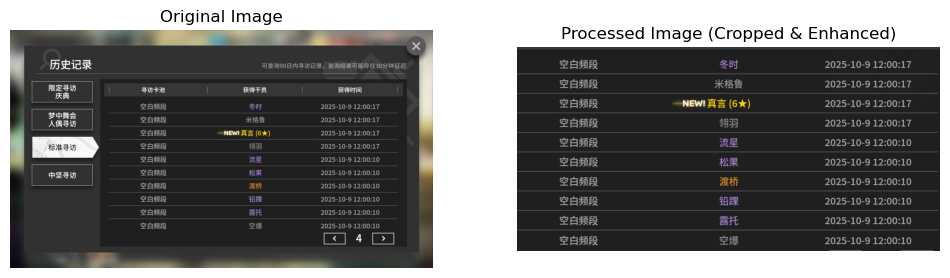

OCR result for ./images\MuMu-20251209-171909-032.png:
=
=
=
=
=
=
=
=
=
空白频

交欢交欢交欢次送关|病

冬时
米格鲁
一NEWI 真言 (6女)
钾羽
流星
松果
渡桥
铅踩
露托
空爆

2025-10-9 12:00:17
2025-10-9 12:00:17
2025-10-9 12:00:17
2025-10-9 12:00:17
2025-10-9 12:00:10
2025-10-9 12:00:10
2025-10-9 12:00:10
2025-10-9 12:00:10
2025-10-9 12:00:10
2025-10-9 12:00:10




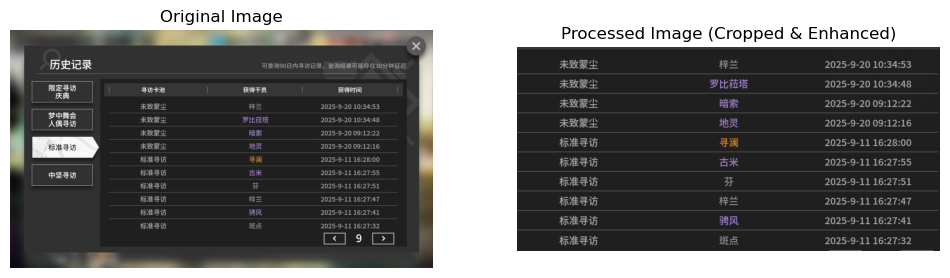

OCR result for ./images\MuMu-20251209-181615-541.png:
未致蒙尘
未致蒙尘
未致蒙尘
未致蒙尘
标准寻访
标准寻访
标准寻访
标准寻访
标准寻访
标准寻访

梓兰
罗比范塔
暗索
地灵

2025-9-20 10:34:53
2025-9-20 10:34:48
2025-9-20 09:12:22
2025-9-20 09:12:16
2025-9-11 16:28:00
2025-9-11 16:27:55
2025-9-11 16:27:51
2025-9-11 16:27:47
2025-9-11 16:27:41
2025-9-11 16:27:32




In [ ]:
from PIL import Image
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import os

# Windows系统需要设置路径
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Helper function to apply OCR on an image
def try_ocr(img):
    try:
        # Ensure pytesseract is installed and use Chinese language and English language
        txt = pytesseract.image_to_string(img, lang='chi_sim')
        return txt
    except Exception as e:
        print(f"OCR failed: {e}")
        return None

# Crop the table area from the image (assumes right part of the image contains the table)
def crop_table_area(img):
    w, h = img.size
    left = int(w * 0.24)
    right = int(w * 0.92)
    top = int(h * 0.27)
    bottom = int(h * 0.854)
    return img.crop((left, top, right, bottom))

def improve_for_ocr(img: Image.Image) -> Image.Image:
    """
    对图片进行预处理以提高 OCR 准确率
    """
    im = img.copy()
    img_array = np.array(im)
    #　将特定颜色的像素（RGB(31,31,31)以及一定范围内相似的像素）设为黑色。
    target_color = np.array([31, 31, 31])
    tolerance = 15
    
    # 计算颜色差异
    color_diff = np.abs(img_array[:, :, :3] - target_color)
    mask = np.all(color_diff <= tolerance, axis=2)
    
    # 统一处理方式：无论图像模式如何，都只设置RGB通道为黑色
    # 对于有alpha通道的图像，alpha通道保持不变
    img_array[mask, :3] = [0, 0, 0]
    # 返回处理后的 PIL.Image
    processed_img = Image.fromarray(img_array)    

    return processed_img

# Function to process images
def process_image(image_path):
    img = Image.open(image_path)
    table = crop_table_area(img)  # Crop table area
    proc = improve_for_ocr(table)  # Improve for OCR
    ocr_text = try_ocr(proc)  # Run OCR

    # Show both original and processed images for visual comparison
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis('off')

    # Processed image (cropped and enhanced)
    plt.subplot(1, 2, 2)
    plt.imshow(proc, cmap="gray")
    plt.title("Processed Image (Cropped & Enhanced)")
    plt.axis('off')

    plt.show()

    if ocr_text is None:
        print(f"OCR failed for image: {image_path}")
        return None
    else:
        print(f"OCR result for {image_path}:\n{ocr_text}")
    return ocr_text

# 自动读取指定路径下的所有图片文件
def get_image_paths(directory):
    supported_extensions = ('.png', '.jpg', '.jpeg', '.bmp', '.tiff')  # 支持的图片格式
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.lower().endswith(supported_extensions)]


image_directory = "./images"  
image_paths = get_image_paths(image_directory)

if not image_paths:
    print(f"No images found in directory: {image_directory}")
else:
    for path in image_paths:
        process_image(path)